In [29]:
import geopandas as gpd
import pandas as pd
import jsonpickle as jp
import json
import maup
pd.set_option('display.max_columns', None)

Importing Data

In [30]:
precinct_boundaries = gpd.read_file('data/Texas/boundary_data/v2/tl_2020_48_vtd20.shp')
us_hor_results = pd.read_csv('data/US/2020-HOUSE-precinct-general.csv')
af = pd.read_csv('data/Texas/demographic_data/anderson-fisher/DECENNIALPL2020.P2-Data.csv')
fl = pd.read_csv('data/Texas/demographic_data/floyd-lubbock/DECENNIALPL2020.P2-Data.csv')
lt = pd.read_csv('data/Texas/demographic_data/lynn-travis/DECENNIALPL2020.P2-Data.csv')
tz = pd.read_csv('data/Texas/demographic_data/trinity-zavala/DECENNIALPL2020.P2-Data.csv')
current_districting = gpd.read_file('data/Texas/current_districting/US_House_Districts2020.shp')

In [31]:
display(precinct_boundaries)
display(us_hor_results[us_hor_results['state_po'] == 'TX'])
#display(precinct_boundaries.plot())

,STATEFP20,COUNTYFP20,VTDST20,GEOID20,VTDI20,NAME20,NAMELSAD20,LSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,48,025,000001,48025000001,P,0001,Voting District 0001,V1,G5240,S,645776033,24731,+28.4194655,-097.5833042,"POLYGON ((-97.75391 28.44617, -97.75385 28.446..."
1,48,025,000013,48025000013,P,0013,Voting District 0013,V1,G5240,S,374582346,0,+28.3832194,-097.8455392,"POLYGON ((-97.98486 28.48560, -97.98476 28.485..."
2,48,025,000018,48025000018,P,0018,Voting District 0018,V1,G5240,S,111990810,45400,+28.4857499,-097.7932540,"POLYGON ((-97.87291 28.50342, -97.87266 28.504..."
3,48,025,000017,48025000017,P,0017,Voting District 0017,V1,G5240,S,6875556,0,+28.4162251,-097.7722505,"POLYGON ((-97.79892 28.41606, -97.79863 28.416..."
4,48,025,000009,48025000009,P,0009,Voting District 0009,V1,G5240,S,2736709,0,+28.3966123,-097.7652475,"POLYGON ((-97.77686 28.39806, -97.77609 28.398..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9002,48,169,000005,48169000005,A,000005,000005,00,G5240,N,160072775,272379,+33.3459059,-101.5143008,"POLYGON ((-101.55700 33.28722, -101.55699 33.2..."
9003,48,075,000401,48075000401,P,0401,Voting District 0401,V1,G5240,S,900692816,31036134,+34.6444526,-100.2210133,"POLYGON ((-100.41591 34.59005, -100.41591 34.5..."
9004,48,075,000301,48075000301,P,0301,Voting District 0301,V1,G5240,S,312519660,7972345,+34.4950506,-100.1301894,"POLYGON ((-100.31232 34.47176, -100.31222 34.4..."
9005,48,075,000101,48075000101,P,0101,Voting District 0101,V1,G5240,S,285471209,3419713,+34.4047178,-100.3411464,"POLYGON ((-100.41778 34.31911, -100.41777 34.3..."


,precinct,office,party_detailed,party_simplified,mode,votes,county_name,county_fips,jurisdiction_name,jurisdiction_fips,candidate,district,magnitude,dataverse,year,stage,state,special,writein,state_po,state_fips,state_cen,state_ic,date,readme_check
680939,0050001,US HOUSE,DEMOCRAT,DEMOCRAT,TOTAL,117,ANGELINA,48005.0,ANGELINA,48005.0,GILBERT,1,1,HOUSE,2020,GEN,TEXAS,False,False,TX,48,74,49,2020-11-03,False
680940,0050001,US HOUSE,REPUBLICAN,REPUBLICAN,TOTAL,165,ANGELINA,48005.0,ANGELINA,48005.0,GOHMERT,1,1,HOUSE,2020,GEN,TEXAS,False,False,TX,48,74,49,2020-11-03,False
680941,0050002,US HOUSE,DEMOCRAT,DEMOCRAT,TOTAL,989,ANGELINA,48005.0,ANGELINA,48005.0,GILBERT,1,1,HOUSE,2020,GEN,TEXAS,False,False,TX,48,74,49,2020-11-03,False
680942,0050002,US HOUSE,REPUBLICAN,REPUBLICAN,TOTAL,373,ANGELINA,48005.0,ANGELINA,48005.0,GOHMERT,1,1,HOUSE,2020,GEN,TEXAS,False,False,TX,48,74,49,2020-11-03,False
680943,0050003,US HOUSE,DEMOCRAT,DEMOCRAT,TOTAL,241,ANGELINA,48005.0,ANGELINA,48005.0,GILBERT,1,1,HOUSE,2020,GEN,TEXAS,False,False,TX,48,74,49,2020-11-03,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710779,4570017,US HOUSE,REPUBLICAN,REPUBLICAN,TOTAL,254,TYLER,48457.0,TYLER,48457.0,BABIN,36,1,HOUSE,2020,GEN,TEXAS,False,False,TX,48,74,49,2020-11-03,False
710780,4570018,US HOUSE,DEMOCRAT,DEMOCRAT,TOTAL,113,TYLER,48457.0,TYLER,48457.0,LEWIS,36,1,HOUSE,2020,GEN,TEXAS,False,False,TX,48,74,49,2020-11-03,False
710781,4570018,US HOUSE,LIBERTARIAN,LIBERTARIAN,TOTAL,18,TYLER,48457.0,TYLER,48457.0,ABBEY,36,1,HOUSE,2020,GEN,TEXAS,False,False,TX,48,74,49,2020-11-03,False
710782,4570018,US HOUSE,GREEN,OTHER,TOTAL,3,TYLER,48457.0,TYLER,48457.0,RIDLEY,36,1,HOUSE,2020,GEN,TEXAS,False,False,TX,48,74,49,2020-11-03,False


Boundary Data Preprocessing

In [32]:
precinct_boundaries['precinct'] =precinct_boundaries['COUNTYFP20'] + precinct_boundaries['VTDST20'].str[2:]
precinct_boundaries['geometry'] = precinct_boundaries['geometry'].to_crs(3857)
precinct_boundaries['geometry'] = maup.close_gaps(precinct_boundaries['geometry'])
precinct_boundaries['geometry'] = maup.resolve_overlaps(precinct_boundaries['geometry'])
final_columns = ['precinct', 'geometry']
precinct_boundaries = precinct_boundaries[precinct_boundaries.columns.intersection(final_columns)]
display(precinct_boundaries)
display(precinct_boundaries[precinct_boundaries['precinct'] == '507004A'])

c:\Users\samcs\anaconda3\envs\geo_env\lib\site-packages\maup\indexed_geometries.py:15: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  geometry.index = i
c:\Users\samcs\anaconda3\envs\geo_env\lib\site-packages\maup\indexed_geometries.py:16: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)


,geometry,precinct
0,"POLYGON ((-10881915.821 3305342.745, -10881908...",0250001
1,"POLYGON ((-10907625.217 3310336.267, -10907614...",0250013
2,"POLYGON ((-10895162.863 3312592.881, -10895135...",0250018
3,"POLYGON ((-10886926.101 3301531.842, -10886894...",0250017
4,"POLYGON ((-10884470.835 3299253.532, -10884385...",0250009
...,...,...
9002,"POLYGON ((-11305273.846 3933489.959, -11305273...",1690005
9003,"POLYGON ((-11178248.426 4108308.604, -11178248...",0750401
9004,"POLYGON ((-11166716.511 4092325.500, -11166705...",0750301
9005,"POLYGON ((-11178455.921 4071731.693, -11178455...",0750101


,geometry,precinct
4327,"POLYGON ((-11144677.375 3331312.132, -11144676...",507004A


Voting Data preprocessing

In [33]:
us_hor_results.drop(["office",'party_detailed','mode','county_name','county_fips','jurisdiction_name','jurisdiction_fips','candidate','district','magnitude','dataverse','year','stage','state','special','writein','state_fips','state_cen','state_ic','date','readme_check'], axis = 1, inplace=True)
vote = us_hor_results[us_hor_results['state_po'] == 'TX'].copy()
vote.drop(["state_po"], axis = 1, inplace=True)
#vote['precinct'] = vote['precinct'].astype(int)
display(vote)

,precinct,party_simplified,votes
680939,0050001,DEMOCRAT,117
680940,0050001,REPUBLICAN,165
680941,0050002,DEMOCRAT,989
680942,0050002,REPUBLICAN,373
680943,0050003,DEMOCRAT,241
...,...,...,...
710779,4570017,REPUBLICAN,254
710780,4570018,DEMOCRAT,113
710781,4570018,LIBERTARIAN,18
710782,4570018,OTHER,3


Demographic Data Cleaning

In [34]:
af.drop([0], axis = 0, inplace=True) #drop Header row
fl.drop([0], axis = 0, inplace=True) #drop Header row
lt.drop([0], axis = 0, inplace=True) #drop Header row
tz.drop([0], axis = 0, inplace=True) #drop Header row
racial_demographic_frames = [af, fl, lt, tz]
racial_demographics = pd.concat(racial_demographic_frames)
racial_demographics['county'] = racial_demographics['GEO_ID'].str[11:14]
racial_demographics['precinct'] = racial_demographics['GEO_ID'].str[16:]
racial_demographics['precinct'] = racial_demographics['county'] + racial_demographics['precinct']
racial_demographics['totalPop'] = racial_demographics['P2_001N'].astype(int)
racial_demographics['africanAmericanPop'] = racial_demographics['P2_006N'].astype(int)
racial_demographics['caucasianPop'] = racial_demographics['P2_005N'].astype(int)
racial_demographics['latinoPop'] = racial_demographics['P2_002N'].astype(int)
racial_demographics['asainPop'] = racial_demographics['P2_008N'].astype(int)
racial_demographics['nativeAmericanPop'] = racial_demographics['P2_007N'].astype(int)
final_columns = ['county','precinct', 'totalPop','africanAmericanPop','caucasianPop','latinoPop','asainPop', 'nativeAmericanPop']
racial_demographics = racial_demographics[racial_demographics.columns.intersection(final_columns)]

display(racial_demographics)

,county,precinct,totalPop,africanAmericanPop,caucasianPop,latinoPop,asainPop,nativeAmericanPop
1,001,0010001,3153,840,1660,487,42,4
2,001,0010002,3811,209,3159,294,10,20
3,001,0010003,1925,124,1408,294,23,9
4,001,0010004,2306,71,2004,131,5,18
5,001,0010005,405,10,335,37,1,2
...,...,...,...,...,...,...,...,...
559,507,5070002,2737,21,87,2604,5,5
560,507,5070003,2626,22,66,2514,3,6
561,507,5070004,1487,10,182,1287,2,2
562,507,507001A,1010,8,76,913,5,4


Combining Data Functions

In [35]:
def total_votes(precinct, party, source):
    #precintdf = source[(source['precinct'].str.contains(precinct)) & (source['party'] == party)]
    precinctdf = get_precinct(precinct, source)
    precinctdf = precinctdf[precinctdf['party_simplified'] == party]
    return precinctdf['votes'].sum()

def get_precinct(precinct, source):
    precinctdf = source[source['precinct'] == precinct]
    return precinctdf

Combining Data

In [36]:
state = precinct_boundaries
display(state)
display(vote)

,geometry,precinct
0,"POLYGON ((-10881915.821 3305342.745, -10881908...",0250001
1,"POLYGON ((-10907625.217 3310336.267, -10907614...",0250013
2,"POLYGON ((-10895162.863 3312592.881, -10895135...",0250018
3,"POLYGON ((-10886926.101 3301531.842, -10886894...",0250017
4,"POLYGON ((-10884470.835 3299253.532, -10884385...",0250009
...,...,...
9002,"POLYGON ((-11305273.846 3933489.959, -11305273...",1690005
9003,"POLYGON ((-11178248.426 4108308.604, -11178248...",0750401
9004,"POLYGON ((-11166716.511 4092325.500, -11166705...",0750301
9005,"POLYGON ((-11178455.921 4071731.693, -11178455...",0750101


,precinct,party_simplified,votes
680939,0050001,DEMOCRAT,117
680940,0050001,REPUBLICAN,165
680941,0050002,DEMOCRAT,989
680942,0050002,REPUBLICAN,373
680943,0050003,DEMOCRAT,241
...,...,...,...
710779,4570017,REPUBLICAN,254
710780,4570018,DEMOCRAT,113
710781,4570018,LIBERTARIAN,18
710782,4570018,OTHER,3


In [37]:
state['demVotes'] = state['precinct'].apply(lambda precinct: total_votes(precinct, 'DEMOCRAT', vote))
state['repVotes'] = state['precinct'].apply(lambda precinct: total_votes(precinct, 'REPUBLICAN', vote))
state['totalVotes'] = state['demVotes'] + state['repVotes']
display(state)

,geometry,precinct,demVotes,repVotes,totalVotes
0,"POLYGON ((-10881915.821 3305342.745, -10881908...",0250001,458,769,1227
1,"POLYGON ((-10907625.217 3310336.267, -10907614...",0250013,331,574,905
2,"POLYGON ((-10895162.863 3312592.881, -10895135...",0250018,295,784,1079
3,"POLYGON ((-10886926.101 3301531.842, -10886894...",0250017,287,358,645
4,"POLYGON ((-10884470.835 3299253.532, -10884385...",0250009,262,148,410
...,...,...,...,...,...
9002,"POLYGON ((-11305273.846 3933489.959, -11305273...",1690005,14,70,84
9003,"POLYGON ((-11178248.426 4108308.604, -11178248...",0750401,85,544,629
9004,"POLYGON ((-11166716.511 4092325.500, -11166705...",0750301,76,422,498
9005,"POLYGON ((-11178455.921 4071731.693, -11178455...",0750101,51,455,506


In [38]:
display(state['totalVotes'].value_counts())
display(state[state['totalVotes'] == 0])
display(vote[vote['precinct'].str.contains('943')])

0       406
1        31
2        21
3        19
11       14
       ... 
5121      1
526       1
3526      1
1895      1
506       1
Name: totalVotes, Length: 3075, dtype: int64

,geometry,precinct,demVotes,repVotes,totalVotes
36,"MULTIPOLYGON (((-11332841.751 3917574.410, -11...",3050001,0,0,0
230,"MULTIPOLYGON (((-11384518.963 3539993.997, -11...",4430004,0,0,0
231,"MULTIPOLYGON (((-11384223.995 3511136.049, -11...",4430002,0,0,0
302,"POLYGON ((-10989150.285 3476256.694, -10989121...",2592120,0,0,0
399,"MULTIPOLYGON (((-11436115.791 4057743.522, -11...",0170004,0,0,0
...,...,...,...,...,...
8786,"POLYGON ((-10653235.047 3555330.538, -10653234...",3390038,0,0,0
8807,"POLYGON ((-10664866.049 3532656.832, -10664864...",3390018,0,0,0
8963,"MULTIPOLYGON (((-11053903.810 3858504.902, -11...",4170406,0,0,0
8973,"MULTIPOLYGON (((-10555500.955 3779469.811, -10...",4010314,0,0,0


,precinct,party_simplified,votes
687056,2010943,DEMOCRAT,211
687057,2010943,LIBERTARIAN,17
687058,2010943,REPUBLICAN,91
689474,4394328,DEMOCRAT,379
689475,4394328,LIBERTARIAN,33
...,...,...,...
707595,4394370,DEMOCRAT,0
707596,4394370,LIBERTARIAN,0
707597,4394370,OTHER,0
707598,4394370,OTHER,0


In [39]:
state = state.merge(racial_demographics, left_on = 'precinct', right_on = 'precinct', how = 'left')
state = state.fillna(0)
state['totalPop'] = state['totalPop'].astype(int)
state['africanAmericanPop'] = state['africanAmericanPop'].astype(int)
state['caucasianPop'] = state['caucasianPop'].astype(int)
state['latinoPop'] = state['latinoPop'].astype(int)
state['asainPop'] = state['asainPop'].astype(int)
state['nativeAmericanPop'] = state['nativeAmericanPop'].astype(int)
display(state.head())

,geometry,precinct,demVotes,repVotes,totalVotes,county,totalPop,africanAmericanPop,caucasianPop,latinoPop,asainPop,nativeAmericanPop
0,"POLYGON ((-10881915.821 3305342.745, -10881908...",0250001,458,769,1227,025,3209,80,1050,1973,39,11
1,"POLYGON ((-10907625.217 3310336.267, -10907614...",0250013,331,574,905,025,2097,12,719,1334,6,0
2,"POLYGON ((-10895162.863 3312592.881, -10895135...",0250018,295,784,1079,025,2417,50,1046,1227,29,1
3,"POLYGON ((-10886926.101 3301531.842, -10886894...",0250017,287,358,645,025,1839,56,421,1309,15,0
4,"POLYGON ((-10884470.835 3299253.532, -10884385...",0250009,262,148,410,025,1015,16,87,903,0,2


Error Analysis

In [40]:
#Population Error Checking
total_pop_calc = state['totalPop'].sum()
total_pop_raw = racial_demographics['totalPop'].sum()
pop_error = (total_pop_calc - total_pop_raw)/total_pop_raw *100
display('Total Population Calculated: '+str(total_pop_calc))
display('Total Population Raw: '+str(total_pop_raw))
display('Percent Error: %'+str(pop_error))
display(state['precinct'][state['totalPop'] == 0])

'Total Population Calculated: 29145505'

'Total Population Raw: 29145505'

'Percent Error: %0.0'

976     2270037
994     2270209
1074    0710013
1500    2090301
1558    1410191
         ...   
8424    0410042
8435    0410064
8461    0410083
8464    0410068
8470    0410062
Name: precinct, Length: 236, dtype: object

In [41]:
total_vote_calc = state['totalVotes'].sum()
total_vote_raw = vote['votes'][vote['party_simplified'] == 'DEMOCRAT'].sum() + vote['votes'][vote['party_simplified'] == 'REPUBLICAN'].sum()
vote_error = (total_vote_calc - total_vote_raw)/total_vote_raw *100
display('Total Vote Calculated: '+str(total_vote_calc))
display('Total Vote Raw: '+str(total_vote_raw))   
display('Percent Error: %'+str(vote_error))

'Total Vote Calculated: 10587034'

'Total Vote Raw: 10820624'

'Percent Error: %-2.1587479613005685'

Import Current Districting

,OBJECTID_1,FID_1,OBJECTID,REP_NM,LAYOUT,DIST_NBR,ELCTN_YR,PLACE,SHAPE_Leng,SHAPE_Area,geometry
0,1,0,1,Louie Gohmert Jr,P,1,2016,US House,11.220181,2.034994,"POLYGON ((-95.59422 32.58592, -95.59423 32.590..."
1,2,1,2,Dan Crenshaw,L,2,2016,US House,3.680158,0.079894,"POLYGON ((-95.64516 29.86767, -95.64518 29.868..."
2,3,2,3,Van Taylor,P,3,2016,US House,2.103968,0.129837,"POLYGON ((-96.83880 33.21939, -96.83880 33.219..."
3,4,3,4,Pat Fallon,L,4,2016,US House,13.749544,2.638177,"POLYGON ((-96.94402 33.72004, -96.94402 33.720..."
4,5,4,5,Lance Gooden,P,5,2016,US House,11.213757,1.297183,"POLYGON ((-96.76470 32.87170, -96.76488 32.871..."
5,6,5,6,Jake Ellzey,P,6,2016,US House,5.762699,0.556879,"POLYGON ((-97.38859 32.61709, -97.38860 32.617..."
6,7,6,7,Lizzie Fletcher,L,7,2016,US House,1.925387,0.039432,"POLYGON ((-95.71987 29.83125, -95.72287 29.831..."
7,8,7,8,Kevin Brady,P,8,2016,US House,9.101484,1.517101,"POLYGON ((-96.26327 31.08962, -96.26318 31.089..."
8,9,8,9,Al Green,L,9,2016,US House,1.829072,0.040468,"POLYGON ((-95.71546 29.70539, -95.70922 29.705..."
9,10,9,10,Michael McCaul,L,10,2016,US House,10.196636,1.245095,"POLYGON ((-97.92648 30.45358, -97.92659 30.454..."


c:\Users\samcs\anaconda3\envs\geo_env\lib\site-packages\maup\indexed_geometries.py:16: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)
c:\Users\samcs\anaconda3\envs\geo_env\lib\site-packages\maup\indexed_geometries.py:16: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)


,geometry,precinct,demVotes,repVotes,totalVotes,county,totalPop,africanAmericanPop,caucasianPop,latinoPop,asainPop,nativeAmericanPop,district
0,"POLYGON ((-10881915.821 3305342.745, -10881908...",0250001,458,769,1227,025,3209,80,1050,1973,39,11,34
1,"POLYGON ((-10907625.217 3310336.267, -10907614...",0250013,331,574,905,025,2097,12,719,1334,6,0,34
2,"POLYGON ((-10895162.863 3312592.881, -10895135...",0250018,295,784,1079,025,2417,50,1046,1227,29,1,34
3,"POLYGON ((-10886926.101 3301531.842, -10886894...",0250017,287,358,645,025,1839,56,421,1309,15,0,34
4,"POLYGON ((-10884470.835 3299253.532, -10884385...",0250009,262,148,410,025,1015,16,87,903,0,2,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9002,"POLYGON ((-11305273.846 3933489.959, -11305273...",1690005,14,70,84,169,166,0,129,33,0,1,19
9003,"POLYGON ((-11178248.426 4108308.604, -11178248...",0750401,85,544,629,075,1438,24,1004,339,18,3,13
9004,"POLYGON ((-11166716.511 4092325.500, -11166705...",0750301,76,422,498,075,2310,374,1054,805,20,2,13
9005,"POLYGON ((-11178455.921 4071731.693, -11178455...",0750101,51,455,506,075,1484,143,812,463,8,5,13


,geometry,demVotes,repVotes,totalVotes,totalPop,africanAmericanPop,caucasianPop,latinoPop,asainPop,nativeAmericanPop
district,,,,,,,,,,
1,"POLYGON ((-10628593.067 3783571.287, -10628592...",82400,217756,300156,722363,119430,430292,134195,8796,2396
2,"POLYGON ((-10636509.796 3475854.674, -10636777...",145117,188280,333397,814704,103769,337977,272374,66568,1734
3,"POLYGON ((-10780619.342 3894882.313, -10780619...",176131,227218,403349,933008,95599,465069,143321,179939,3232
4,"POLYGON ((-10744396.338 3877684.132, -10744396...",75258,249168,324426,787256,79586,527203,124168,10571,6127
5,"POLYGON ((-10762584.084 3868250.828, -10762612...",100107,173448,273555,783116,117557,378717,240388,16558,2879
6,"POLYGON ((-10833552.516 3843009.676, -10833509...",148629,178942,327571,824978,177041,356727,208479,43455,2725
7,"POLYGON ((-10648170.057 3469555.427, -10648394...",158198,147402,305600,800911,117559,301742,258057,90863,1390
8,"POLYGON ((-10649041.668 3513988.412, -10648987...",91551,258269,349820,916386,76630,533596,233221,31674,2764
9,"POLYGON ((-10637610.160 3451399.623, -10637515...",172938,49575,222513,770838,277901,70258,311337,91419,953


<AxesSubplot: >

<AxesSubplot: >

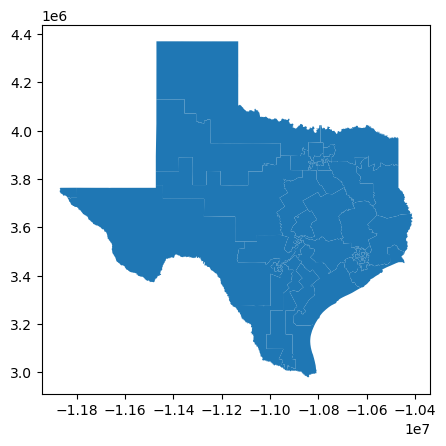

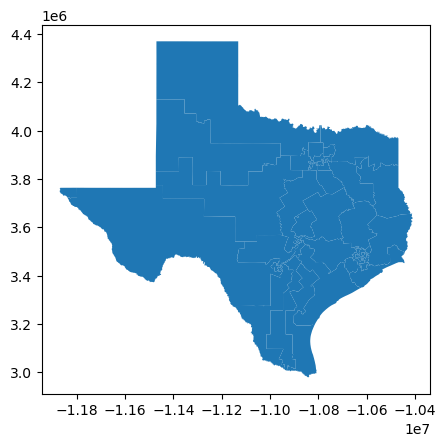

In [42]:
display(current_districting)
current_districting['geometry'] = current_districting['geometry'].to_crs(3857)
def assign_district(precinct_geo):
    inter = current_districting[current_districting.intersects(precinct_geo)]
    #inter = current_districting[current_districting.overlay(precinct_geo)]
    #display(inter)
                                
    return inter['DISTRICT'].min()

#def assign_area(geometry):
    

#def assign_district(geoid):
#    precincts = inter[inter['GEO_ID'] == geoid]
#    max_i = precincts['area'].max()
#    return precincts[precincts['area'] == max_i]['DISTRICT'].min()
    
inter = current_districting.overlay(state)
inter['area'] = inter.area
#display(inter)
#state['district'] = state['geometry'].apply(assign_district)
state['district'] = maup.assign(state, current_districting)
state['district'] = state['district'] + 1
display(state)
#display(state['district'].unique())
dist = state.dissolve(by = 'district', aggfunc = 'sum')
display(dist)
display(dist.plot())
display(current_districting.plot())

Exporting State Data

In [43]:
state.to_file('data/Texas/texasGeo.geojson', driver='GeoJSON', index = True)
noGeo = pd.DataFrame(state.drop(columns='geometry'))
noGeo.to_json('data/Texas/texas.json', orient = 'index', compression = 'infer', index = True, indent = 4)

Computing Adjacency Graph Functions

In [44]:
def generate_adj(precinct, state):
    return 0

def addEdge(edges, index1, index2):
    if(index1 < index2):
        edges.add((int(index1),int(index2)))
    if(index1 > index2):
        edges.add((int(index2),int(index1)))

Computing Adjacency Graph

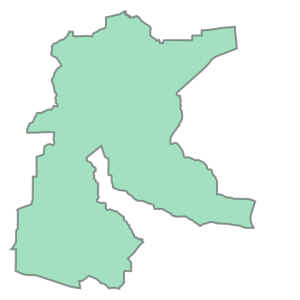

array([54, 56, 62, 66, 68], dtype=int64)

{(3014, 3015),
 (4196, 4678),
 (2654, 2672),
 (1544, 1639),
 (8032, 8110),
 (377, 1038),
 (7819, 8002),
 (5379, 5408),
 (8319, 8325),
 (6870, 7072),
 (597, 2475),
 (2281, 2282),
 (321, 325),
 (904, 905),
 (3352, 3360),
 (4783, 4973),
 (7570, 7648),
 (1458, 1464),
 (1993, 2000),
 (1611, 1706),
 (4823, 5311),
 (1927, 1942),
 (6395, 6405),
 (5811, 6354),
 (1081, 1891),
 (7506, 8013),
 (1508, 7593),
 (971, 972),
 (4219, 4234),
 (4890, 5193),
 (5404, 5414),
 (4408, 4695),
 (7577, 7664),
 (2042, 2050),
 (6109, 6169),
 (5993, 5994),
 (623, 639),
 (2386, 2991),
 (1026, 1029),
 (4057, 4064),
 (2097, 2107),
 (4400, 4403),
 (507, 814),
 (1321, 1327),
 (3294, 3489),
 (5868, 6083),
 (3041, 3043),
 (5752, 5908),
 (7016, 7381),
 (8198, 8290),
 (4952, 5266),
 (4910, 5040),
 (6704, 6705),
 (3547, 3561),
 (8875, 8882),
 (3307, 3320),
 (3169, 3386),
 (1529, 1599),
 (8701, 8702),
 (4198, 4430),
 (6434, 7002),
 (8130, 8132),
 (4673, 4696),
 (3945, 3957),
 (1443, 1451),
 (1561, 1672),
 (6922, 6941),
 (5394,

27854

In [45]:
edges = set()
testi = 57
display(state['geometry'][testi])
touch = state['geometry'].touches(state['geometry'][testi])
statesubset = state[touch]
display(statesubset.index.values)

for i in state.index:
    touch = state['geometry'].touches(state['geometry'][i])
    statesubset = state[touch]
    for j in statesubset.index.values:
        addEdge(edges, i, j)

display(edges)
display(len(edges))

Edge Spot Check

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

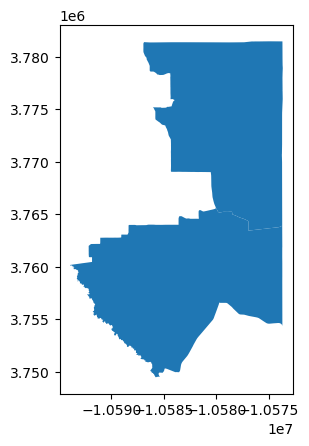

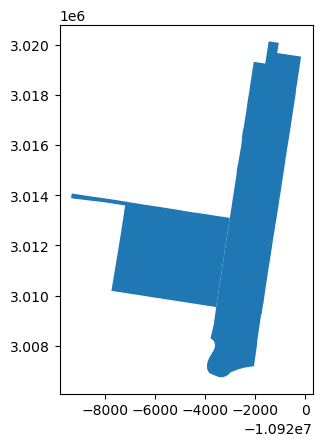

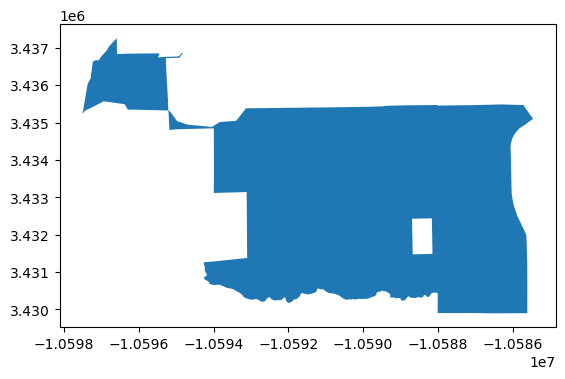

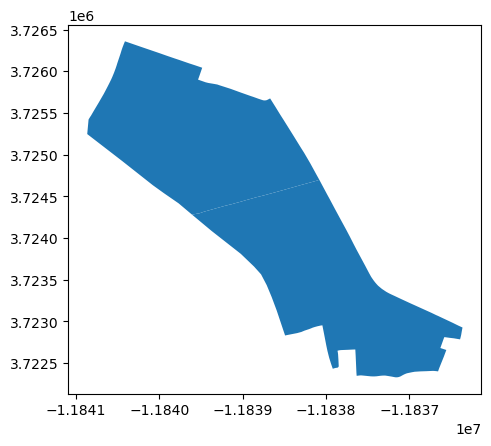

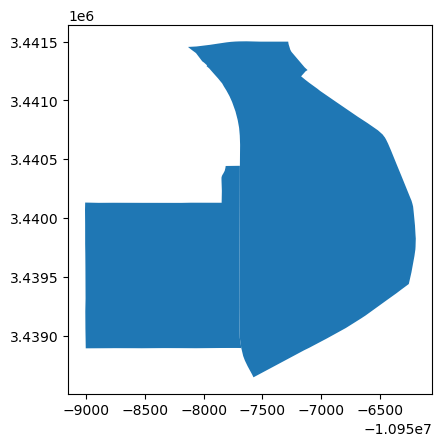

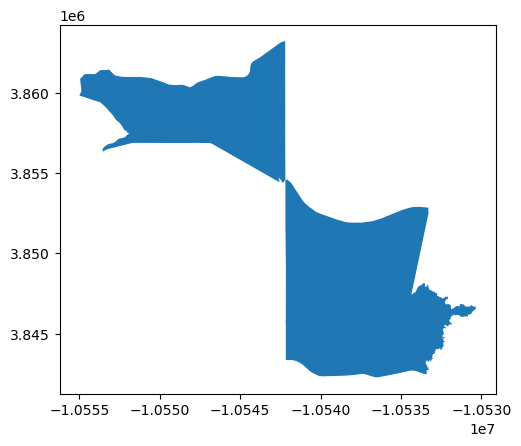

In [46]:
edge_index = 0
for edge in edges:
    display(state.iloc[list(edge)].plot())
    edge_index = edge_index + 1
    if(edge_index > 5):
        break

Edge Error Checking

In [48]:
missing_index = set()
found = False
for i in state.index:
    found = False
    for j in edges:
        if(i in j):
            found = True
            break
    if(not found):
        missing_index.add(i)
display(len(missing_index))
display(missing_index)
for precinct_index in missing_index:
    display(state.iloc[[precinct_index]])
    display(state.iloc[[precinct_index]].plot())

0

set()

Exporting Adjacency Graph Edges

In [47]:
edgeList = list(edges)
display(edgeList)
display(type(edgeList[0]))
display(type(edgeList[0][0]))
with open('data/Texas/texasEdges.json', 'w', encoding='utf-8') as file:
    json.dump(edgeList, file, ensure_ascii=False, indent=4)

[(3014, 3015),
 (4196, 4678),
 (2654, 2672),
 (1544, 1639),
 (8032, 8110),
 (377, 1038),
 (7819, 8002),
 (5379, 5408),
 (8319, 8325),
 (6870, 7072),
 (597, 2475),
 (2281, 2282),
 (321, 325),
 (904, 905),
 (3352, 3360),
 (4783, 4973),
 (7570, 7648),
 (1458, 1464),
 (1993, 2000),
 (1611, 1706),
 (4823, 5311),
 (1927, 1942),
 (6395, 6405),
 (5811, 6354),
 (1081, 1891),
 (7506, 8013),
 (1508, 7593),
 (971, 972),
 (4219, 4234),
 (4890, 5193),
 (5404, 5414),
 (4408, 4695),
 (7577, 7664),
 (2042, 2050),
 (6109, 6169),
 (5993, 5994),
 (623, 639),
 (2386, 2991),
 (1026, 1029),
 (4057, 4064),
 (2097, 2107),
 (4400, 4403),
 (507, 814),
 (1321, 1327),
 (3294, 3489),
 (5868, 6083),
 (3041, 3043),
 (5752, 5908),
 (7016, 7381),
 (8198, 8290),
 (4952, 5266),
 (4910, 5040),
 (6704, 6705),
 (3547, 3561),
 (8875, 8882),
 (3307, 3320),
 (3169, 3386),
 (1529, 1599),
 (8701, 8702),
 (4198, 4430),
 (6434, 7002),
 (8130, 8132),
 (4673, 4696),
 (3945, 3957),
 (1443, 1451),
 (1561, 1672),
 (6922, 6941),
 (5394,

tuple

int